In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [337]:
df00=pd.read_csv(r'C:\Users\ido14\OneDrive\Desktop\שנה א\מדעי הנתונים\מטלות\Final Projact\weatherAUS.csv')

In [338]:
pd.set_option('display.max_columns',None)
df00.head().T

,0,1,2,3,4
Date,2008-12-01,2008-12-02,2008-12-03,2008-12-04,2008-12-05
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28,32.3
Rainfall,0.6,0,0,0,1
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44,44,46,24,41
WindDir9am,W,NNW,W,SE,ENE


# Exploring the data

## The mean of the features 
  * Date: The date of observation
  * Location: The common name of the lcoation of the weather station
  * MinTemp: The minimum temperature in degrees celcius
  * MaxTemp: The maximum temperature in degrees celsius
  * Rainfall: The amount of rainfall recorded for the day in mm
  * Evaporation: The so-called Class A pan evaporation (mm) in the 24 hours to 9am
  * Sunshine: The number of hours of bright sunshine in the day
  * WindGustDir: The direction of the strongest wind gust in the 24 hours to midnight
  * WindGustSpeed: The speed (km/h) of the strongest wind gust in the 24 hours to midnight
  * WindDir9am: Direction of the wind at 9am
  * WindDir3pm: Direction of the wind at 3pm
  * WindSpeed9am: Wind speed (km/hr) averaged over 10 minutes prior to 9am
  * WindSpeed3pm: Wind speed (km/hr) averaged over 10 minutes prior to 3pm
  * Humidity9am: Humidity (percent) at 9am
  * Humidity3pm: Humidity (percent) at 3pm
  * Pressure9am: Atmospheric pressure (hpa) reduced to mean sea level at 9am
  * Pressure3pm: Atmospheric pressure (hpa) reduced to mean sea level at 3pm
  * Cloud9am: Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how     many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is       completely overcast
  * Cloud3pm: Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
  * Temp9am: Temperature (degrees C) at 9am
  * Temp3pm: Temperature (degrees C) at 3pm
  * RainToday: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
  * RainTomorrow: The target variable. Did it rain tomorrow?
  
  

In [339]:
df00.shape

(145460, 23)

In [340]:
df00.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [341]:
df00.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [342]:
df00.dtypes.sort_values()

WindSpeed9am     float64
Temp3pm          float64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
Temp9am          float64
WindGustSpeed    float64
Cloud3pm         float64
Cloud9am         float64
Pressure3pm      float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Date              object
WindDir3pm        object
WindDir9am        object
WindGustDir       object
Location          object
RainToday         object
RainTomorrow      object
dtype: object

* We want to convert all the data to numeric, so i will have to take care to the objects.

In [343]:
df00.Location.value_counts()

Canberra            3436
Sydney              3344
Brisbane            3193
Adelaide            3193
Darwin              3193
Perth               3193
Melbourne           3193
Hobart              3193
Bendigo             3040
Launceston          3040
Wollongong          3040
Cairns              3040
Albury              3040
Ballarat            3040
GoldCoast           3040
Albany              3040
MountGambier        3040
Townsville          3040
MountGinini         3040
AliceSprings        3040
Tuggeranong         3039
Newcastle           3039
Penrith             3039
Moree               3009
Watsonia            3009
PearceRAAF          3009
Richmond            3009
Portland            3009
PerthAirport        3009
Dartmoor            3009
CoffsHarbour        3009
Witchcliffe         3009
Williamtown         3009
Sale                3009
SydneyAirport       3009
WaggaWagga          3009
Woomera             3009
BadgerysCreek       3009
NorfolkIsland       3009
Cobar               3009


In [344]:
# calculate the % of missing values
data_missing = df00.isnull().sum()
perc_missing = round(100*(data_missing/len(df00)),2)
perc_missing.sort_values()

Date              0.00
Location          0.00
MaxTemp           0.87
MinTemp           1.02
Temp9am           1.21
WindSpeed9am      1.21
Humidity9am       1.82
WindSpeed3pm      2.11
Rainfall          2.24
RainToday         2.24
RainTomorrow      2.25
Temp3pm           2.48
WindDir3pm        2.91
Humidity3pm       3.10
WindGustSpeed     7.06
WindGustDir       7.10
WindDir9am        7.26
Pressure3pm      10.33
Pressure9am      10.36
Cloud9am         38.42
Cloud3pm         40.81
Evaporation      43.17
Sunshine         48.01
dtype: float64

* We can see that Evaporation, Sunshine, Cloud9am and Cloud3pm has a lot of missing data, so i will have to take care of the missing data.

In [345]:
categorical_cols = [var for var in df00.columns if df00[var].dtype=='O']

categorical_nulls = df00[categorical_cols].isnull().sum()

for var in categorical_cols:
    print(var, ' has: \n{} unique values\n {} null values\n'.format(len(df00[var].unique()), categorical_nulls[var]))

Date  has: 
3436 unique values
 0 null values

Location  has: 
49 unique values
 0 null values

WindGustDir  has: 
17 unique values
 10326 null values

WindDir9am  has: 
17 unique values
 10566 null values

WindDir3pm  has: 
17 unique values
 4228 null values

RainToday  has: 
3 unique values
 3261 null values

RainTomorrow  has: 
3 unique values
 3267 null values



In [346]:
numerical_cols = [var for var in df00.columns if df00[var].dtype=='f8']
numerical_nulls = df00[numerical_cols].isnull().sum()

for var in numerical_cols:
    print(var, ' has: \n{} unique values\n {} null values\n'.format(len(df00[var].unique()), numerical_nulls[var]))

MinTemp  has: 
390 unique values
 1485 null values

MaxTemp  has: 
506 unique values
 1261 null values

Rainfall  has: 
682 unique values
 3261 null values

Evaporation  has: 
359 unique values
 62790 null values

Sunshine  has: 
146 unique values
 69835 null values

WindGustSpeed  has: 
68 unique values
 10263 null values

WindSpeed9am  has: 
44 unique values
 1767 null values

WindSpeed3pm  has: 
45 unique values
 3062 null values

Humidity9am  has: 
102 unique values
 2654 null values

Humidity3pm  has: 
102 unique values
 4507 null values

Pressure9am  has: 
547 unique values
 15065 null values

Pressure3pm  has: 
550 unique values
 15028 null values

Cloud9am  has: 
11 unique values
 55888 null values

Cloud3pm  has: 
11 unique values
 59358 null values

Temp9am  has: 
442 unique values
 1767 null values

Temp3pm  has: 
503 unique values
 3609 null values



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ED1CE8A670>,
      dtype=object)

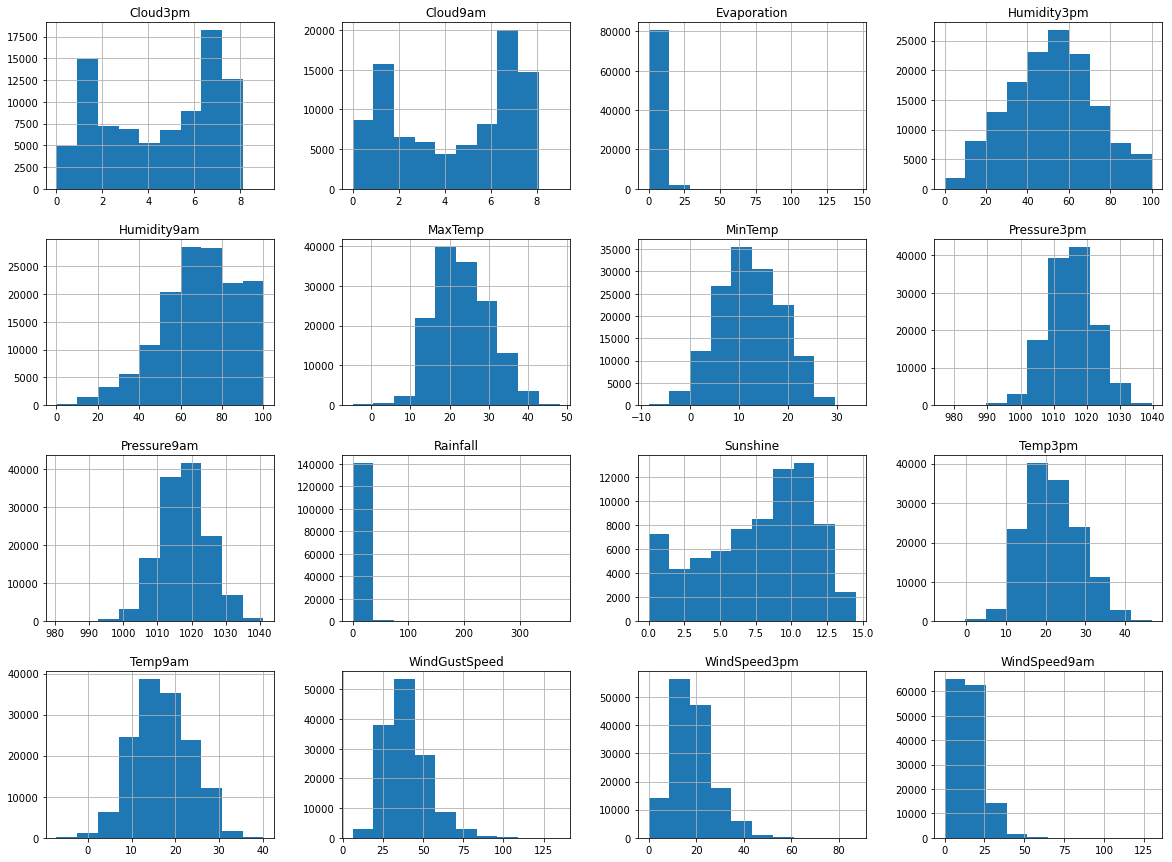

In [347]:
df00.hist(figsize=(20,15))

* We can notice that the only sagnificant difference is between Humidity 9am and Humidity 3pm,       
  the humidity at 9am was higher and then it was lower on 3pm.
* Also the wind speed increased from the time between 9am to 3pm.

In [348]:
corr_matrix = df00.corr()
corr_matrix

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


# Prepare the data

In [349]:
df00["Date"] = pd.to_datetime(df00["Date"])

In [350]:
# I will split the Date to day, month,year and then i will convert it to season in order to get better prediction.
df00["Year"] = df00["Date"].dt.year
df00["Month"] = df00["Date"].dt.month
df00["Day"] = df00["Date"].dt.day
df01=df00.copy()

### These four rows will fill true or false in the seasons columns correspondingly to Australia.

In [351]:
df01["Summer"]=((df01["Month"]==12)|(df01["Month"]==1)|(df01["Month"]==2))
df01["Autumn"]=((df01["Month"]==3)|(df01["Month"]==4)|(df01["Month"]==5))
df01["Winter"]=((df01["Month"]==6)|(df01["Month"]==7)|(df01["Month"]==8))
df01["Spring"]=((df01["Month"]==9)|(df01["Month"]==10)|(df01["Month"]==11))


In [352]:
##This function will convert True to 1 and False to 0
encoder=LabelEncoder()
Labael_Encoder_Columns=["Summer","Autumn","Winter","Spring"]
for column in Labael_Encoder_Columns:
    df01[column]=encoder.fit_transform(df01[column])

In [353]:
df01.drop(["Date","Day","Month","Year"],axis=1,inplace=True)
df01.shape

(145460, 26)

In [354]:
# dropping null values of today and tomorrow variables which is just 2.2%
df02= df01[df01['RainTomorrow'].notnull()]
df02= df02[df02['RainToday'].notnull()]

In [355]:
df02.isnull().sum()

Location             0
MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
RainToday            0
RainTomorrow         0
Summer               0
Autumn               0
Winter               0
Spring               0
dtype: int64

In [356]:
df03=df02.copy()

### Now i will convert the categorial values to numerical values.

###### The next function will add pre name to the given columns.

In [357]:
def column_pre_name(data,column,pre_name):
    return data[column].apply(lambda x:pre_name+str(x))

In [358]:
df03['WindDir9am']=column_pre_name(df03,'WindDir9am',"9_")
df03['WindDir3pm']=column_pre_name(df03,'WindDir3pm',"3_")

In [359]:
df03['WindDir9am'].head()

0      9_W
1    9_NNW
2      9_W
3     9_SE
4    9_ENE
Name: WindDir9am, dtype: object

In [360]:
df04=df03.copy()

###### This function will fill the given columns with dummies correspondingly, and     will remove the old ones.

In [361]:
def onehot_encoder(data,columns):
    for column in columns:
        dummies=pd.get_dummies(data[column])
        data=pd.concat([data,dummies],axis=1)
        data.drop(column,axis=1,inplace=True)
    return data

In [362]:
features=['Location','WindGustDir','WindDir9am','WindDir3pm']
df04=onehot_encoder(df04, features)

In [363]:
df04.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Summer,Autumn,Winter,Spring,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,9_E,9_ENE,9_ESE,9_N,9_NE,9_NNE,9_NNW,9_NW,9_S,9_SE,9_SSE,9_SSW,9_SW,9_W,9_WNW,9_WSW,9_nan,3_E,3_ENE,3_ESE,3_N,3_NE,3_NNE,3_NNW,3_NW,3_S,3_SE,3_SSE,3_SSW,3_SW,3_W,3_WNW,3_WSW,3_nan
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


### After handling the categorial values i will handle the null values

In [364]:
df04.isnull().sum()

MinTemp          468
MaxTemp          307
Rainfall           0
Evaporation    59694
Sunshine       66805
               ...  
3_SW               0
3_W                0
3_WNW              0
3_WSW              0
3_nan              0
Length: 121, dtype: int64

###### This function will fill the null values with the mean values.

In [365]:
def fill_with_mean(data, columns):
    for column in columns:
        data[column]=data[column].fillna(data[column].mean())

In [366]:
df05=df04.copy()

In [367]:
mean_cols=['MinTemp',
           'MaxTemp',
           'Rainfall',
           'Evaporation',
           'Sunshine',
           'WindGustSpeed',
           'WindSpeed9am',
           'WindSpeed3pm',
           'Humidity9am',
           'Humidity3pm',
           'Pressure9am',
           'Pressure3pm',
           'Cloud9am',
           'Cloud3pm',
           'Temp9am',
           'Temp3pm']
fill_with_mean(df05,mean_cols)

In [368]:
df05.isnull().sum().sum()

0

##### After both functions we finally got 0 null values.

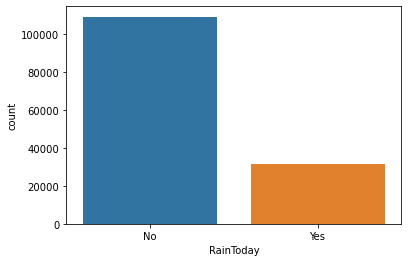

In [369]:
sns.countplot(df05['RainToday'])

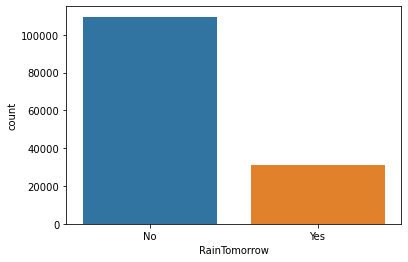

In [370]:
sns.countplot(df05['RainTomorrow'])

In [371]:
df06=df05.copy()

In [372]:
# We will want to work with 0 for No and 1 for Yes 
encoder=LabelEncoder()
Labael_Encoder_Columns=['RainToday','RainTomorrow']
for column in Labael_Encoder_Columns:
    df06[column]=encoder.fit_transform(df06[column])

In [373]:
y=df06["RainTomorrow"]

In [374]:
X=df06.drop("RainTomorrow",axis=1)

## Model training

In [375]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.2, random_state=0)

In [376]:
## Standardize our data
scaler = MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)

In [377]:
X.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Summer,Autumn,Winter,Spring,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,9_E,9_ENE,9_ESE,9_N,9_NE,9_NNE,9_NNW,9_NW,9_S,9_SE,9_SSE,9_SSW,9_SW,9_W,9_WNW,9_WSW,9_nan,3_E,3_ENE,3_ESE,3_N,3_NE,3_NNE,3_NNW,3_NW,3_S,3_SE,3_SSE,3_SSW,3_SW,3_W,3_WNW,3_WSW,3_nan
count,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.00000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.00000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.00000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.00000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000
mean,0.487850,0.529964,0.006334,0.037741,0.526244,0.263337,0.107619,0.214151,0.688268,0.514493,0.614125,0.610527,0.492351,0.499917,0.510276,0.520023,0.223423,0.240867,0.262993,0.252623,0.243517,0.021451,0.021280,0.021245,0.021486,0.020435,0.021430,0.021522,0.022246,0.021053,0.024164,0.021167,0.020883,0.020876,0.022673,0.020769,0.022609,0.010974,0.021451,0.016323,0.021373,0.021344,0.019824,0.021465,0.020002,0.020804,0.011116,0.020513,0.020911,0.021280,0.018794,0.020677,0.022680,0.021373,0.021195,0.020641,0.021252,0.020890,0.023660,0.021316,0.021501,0.021018,0.010669,0.02101,0.019675,0.021238,0.016877,0.020769,0.020904,0.021195,0.063820,0.056284,0.051454,0.063507,0.049735,0.045260,0.046247,0.056390,0.062925,0.065638,0.063252,0.060666,0.06181,0.068870,0.056539,0.062520,0.063763,0.054465,0.05340,0.080022,0.053109,0.055950,0.055275,0.060169,0.059835,0.064750,0.063223,0.052540,0.057960,0.058294,0.050431,0.04820,0.068614,0.058755,0.054302,0.059032,0.061035,0.057583,0.045267,0.054437,0.059622,0.067393,0.075135,0.064196,0.056433,0.064665,0.069680,0.060829,0.065567,0.026068
std,0.150784,0.134343,0.022817,0.021926,0.189061,0.101797,0.068099,0.100214,0.189607,0.205470,0.111557,0.106920,0.253806,0.234384,0.136727,0.131916,0.416541,0.427612,0.440260,0.434518,0.429206,0.144882,0.144318,0.144200,0.144999,0.141484,0.144812,0.145117,0.147484,0.143562,0.153559,0.143940,0.142992,0.142968,0.148858,0.1426

#### I will start with KNN modle and will check different amount of neighbors, in order to get the best score.

In [378]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [379]:
y_pred = classifier.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)

Accuracy : 0.8358193053483912


In [380]:
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [381]:
y_pred = classifier.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)

Accuracy : 0.8427800269905533


In [382]:
classifier = KNeighborsClassifier(n_neighbors=20)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [383]:
y_pred = classifier.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)

Accuracy : 0.8438454435684353
